In [12]:
import pandas as pd
import numpy as np
import glob
from tqdm import tqdm, trange

# http://datos.susalud.gob.pe/dataset/consulta-recursos-de-salud-por-ipress

In [13]:
def category_label(val):
    category_label = None
    if val in ['I-3', 'I-4']:
        category_label = 'I'
    elif val in ['II-1', 'II-2', 'II-E']:
        category_label = 'II'
    elif val in ['III-1', 'III-2', 'III-E']:
        category_label = 'III'
    else:
        pass
        category_label = '0'
    return category_label

### Reading resources

In [14]:
files = glob.glob("src/Reporte_de_Recursos_de_Salud/*")
files

['src/Reporte_de_Recursos_de_Salud\\ConsultaA_Recursos_Salud_2020_v7.csv',
 'src/Reporte_de_Recursos_de_Salud\\ConsultaA_Recursos_Salud_2021_v18.csv',
 'src/Reporte_de_Recursos_de_Salud\\ConsultaA_Recursos_Salud_2022_v2.csv',
 'src/Reporte_de_Recursos_de_Salud\\ConsultaA_Recurso_Salud_2015_v1.csv',
 'src/Reporte_de_Recursos_de_Salud\\ConsultaA_Recurso_Salud_2016_v1.csv',
 'src/Reporte_de_Recursos_de_Salud\\ConsultaA_Recurso_Salud_2017_v1.csv',
 'src/Reporte_de_Recursos_de_Salud\\ConsultaA_Recurso_Salud_2018_v2.csv',
 'src/Reporte_de_Recursos_de_Salud\\ConsultaA_Recurso_Salud_2019_v7.csv']

In [68]:
# Morbilidad B2
files = glob.glob("src/Reporte_de_Recursos_de_Salud/*")

object_df = pd.DataFrame()
for p in tqdm(files):
    try:
        data_temp = pd.read_csv(p, encoding='utf_8')
        pass
    except:
        data_temp = pd.read_csv(p, encoding='latin')
        
    object_df = pd.concat([object_df,data_temp])


object_df = object_df.rename(columns={'ANHO': 'YEAR',
                                      'MES': 'MONTH',
                                      'UBIGEO': 'UBIGEO',
                                      'DEPARTAMENTO': 'STATE',
                                      'PROVINCIA': 'PROVINCE',
                                      'DISTRITO': 'DISTRICT',
                                      'SECTOR': 'SECTOR',
                                      'CATEGORIA': 'CATEGORY',
                                      'CO_IPRESS': 'CO_IPRESS',
                                      'RAZON_SOC': 'NAME',
                                      'CA_CONSULTORIOS': 'QTY_CONSULTING_ROOM',
                                      'CA_CONSULTORIOS_FN': 'QTY_OPERATIONS_CONSULTING_ROOM',
                                      'CA_CAMAS': 'QTY_BEDS',
                                      'CA_MEDICOS_TOTAL': 'QTY_DOCTORS',
                                      'CA_MEDICOS_SERUM': 'QTY_DOCTORS_SERUM',
                                      'CA_MEDICOS_RESIDENTES': 'QTY_DOCTORS_RESIDENT',
                                      'CA_ENFERMERAS': 'QTY_NURSE',
                                      'CA_ODONTOLOGOS': 'QTY_DENTISTS',
                                      'CA_PSICOLOGOS': 'QTY_PSYCHOLOGISTS',
                                      'CA_NUTRICIONISTAS': 'QTY_NUTRITIONISTS',
                                      'CA_TECNOLOGOS_MEDICOS': 'QTY_MEDICAL_TECHNOLOGISTS',
                                      'CA_OBSTETRICES': 'QTY_OBSTETRICIANS',
                                      'CA_FARMACEUTICOS': 'QTY_PHARMACEUTICAL',
                                      'CA_AUXILIARES': 'QTY_AUXILIARY_PERSONAL',
                                      'CA_OTROS_PROF': 'QTY_OTHER_PROFESSIONS',
                                      'CA_AMBULANCIAS': 'QTY_AMBULANCIAS'})

object_df['CATEGORY2'] = object_df['CATEGORY'].apply(lambda x : category_label(x))
object_df['DATE'] = object_df['YEAR'].astype(str) +'-'+object_df['MONTH'].astype(str) 
object_df['DATE'] = pd.to_datetime(object_df['DATE'])
object_df[['QTY_CONSULTING_ROOM',
       'QTY_OPERATIONS_CONSULTING_ROOM', 'QTY_BEDS', 'QTY_DOCTORS',
       'QTY_DOCTORS_SERUM', 'QTY_DOCTORS_RESIDENT', 'QTY_NURSE',
       'QTY_DENTISTS', 'QTY_PSYCHOLOGISTS', 'QTY_NUTRITIONISTS',
       'QTY_MEDICAL_TECHNOLOGISTS', 'QTY_OBSTETRICIANS', 'QTY_PHARMACEUTICAL',
       'QTY_AUXILIARY_PERSONAL', 'QTY_OTHER_PROFESSIONS', 'QTY_AMBULANCIAS']] = object_df[['QTY_CONSULTING_ROOM',
       'QTY_OPERATIONS_CONSULTING_ROOM', 'QTY_BEDS', 'QTY_DOCTORS',
       'QTY_DOCTORS_SERUM', 'QTY_DOCTORS_RESIDENT', 'QTY_NURSE',
       'QTY_DENTISTS', 'QTY_PSYCHOLOGISTS', 'QTY_NUTRITIONISTS',
       'QTY_MEDICAL_TECHNOLOGISTS', 'QTY_OBSTETRICIANS', 'QTY_PHARMACEUTICAL',
       'QTY_AUXILIARY_PERSONAL', 'QTY_OTHER_PROFESSIONS', 'QTY_AMBULANCIAS']].apply(pd.to_numeric, errors='coerce')

object_df.fillna(0)
print('Guardando archivo...')
object_df.to_pickle('data/salud_resources.csv') 
del object_df


 88%|████████▊ | 7/8 [00:00<00:00, 14.23it/s]C:\Users\johnk\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
100%|██████████| 8/8 [00:00<00:00, 11.95it/s]


Guardando archivo...


### Analisys

In [69]:
data = pd.read_pickle('data/salud_resources.csv')

In [128]:
data = pd.read_pickle('data/salud_resources.csv')
data = data[(data['PROVINCE']=='LIMA') | (data['STATE']=='CALLAO')]
data = data[(data['YEAR']==2020)]


data = data.groupby(['CO_IPRESS', 'NAME']).agg({'YEAR': "last",
                                                'MONTH': "last",
                                                'UBIGEO': "last",
                                                'STATE': "last",
                                                'PROVINCE': "last",
                                                'DISTRICT': "last",
                                                'SECTOR': "last",
                                                'CATEGORY': "last",
                                                'CATEGORY2': "last",
                                                'QTY_CONSULTING_ROOM': "last",
                                                'QTY_OPERATIONS_CONSULTING_ROOM': "last",
                                                'QTY_BEDS': "last",
                                                'QTY_DOCTORS': "last",
                                                'QTY_DOCTORS_SERUM': "last",
                                                'QTY_DOCTORS_RESIDENT': "last",
                                                'QTY_NURSE': "last",
                                                'QTY_DENTISTS': "last",
                                                'QTY_PSYCHOLOGISTS': "last",
                                                'QTY_NUTRITIONISTS': "last",
                                                'QTY_MEDICAL_TECHNOLOGISTS': "last",
                                                'QTY_OBSTETRICIANS': "last",
                                                'QTY_PHARMACEUTICAL': "last",
                                                'QTY_AUXILIARY_PERSONAL': "last",
                                                'QTY_OTHER_PROFESSIONS': "last",
                                                'QTY_AMBULANCIAS': "last"})
data = data.reset_index()
# data = data.groupby(['CO_IPRESS', 'NAME']).agg({'UBIGEO': "count"})
# # data = data.reset_index()
# data = data.sort_values(by='UBIGEO', ascending = False)
data.head()

,CO_IPRESS,NAME,YEAR,MONTH,UBIGEO,STATE,PROVINCE,DISTRICT,SECTOR,CATEGORY,...,QTY_NURSE,QTY_DENTISTS,QTY_PSYCHOLOGISTS,QTY_NUTRITIONISTS,QTY_MEDICAL_TECHNOLOGISTS,QTY_OBSTETRICIANS,QTY_PHARMACEUTICAL,QTY_AUXILIARY_PERSONAL,QTY_OTHER_PROFESSIONS,QTY_AMBULANCIAS
0,5617,HOSPITAL SAN JUAN DE LURIGANCHO,2020,11,150132,LIMA,LIMA,SAN JUAN DE LURIGANCHO,MINSA,II-2,...,241.0,0.0,0.0,14.0,49.0,57.0,18.0,348.0,378.0,3.0
1,5883,HOSPITAL DE HUAYCAN,2020,12,150103,LIMA,LIMA,ATE,MINSA,II-1,...,71.0,2.0,5.0,4.0,5.0,41.0,9.0,96.0,2.0,1.0
2,5945,HOSPITAL VITARTE,2020,11,150103,LIMA,LIMA,ATE,MINSA,II-1,...,133.0,7.0,5.0,8.0,30.0,46.0,13.0,248.0,11.0,3.0
3,5946,HOSPITAL NACIONAL HIPOLITO UNANUE,2020,11,150111,LIMA,LIMA,EL AGUSTINO,MINSA,III-1,...,634.0,13.0,17.0,28.0,100.0,61.0,42.0,1080.0,219.0,4.0
4,5947,HOSPITAL DE MEDIANA COMPLEJIDAD JOSE AGURTO TELLO,2020,12,150118,LIMA,LIMA,LURIGANCHO,MINSA,II-2,...,117.0,4.0,5.0,7.0,17.0,19.0,8.0,154.0,9.0,1.0


In [129]:
data.describe()

,CO_IPRESS,YEAR,MONTH,UBIGEO,QTY_CONSULTING_ROOM,QTY_OPERATIONS_CONSULTING_ROOM,QTY_BEDS,QTY_DOCTORS,QTY_DOCTORS_SERUM,QTY_DOCTORS_RESIDENT,QTY_NURSE,QTY_DENTISTS,QTY_PSYCHOLOGISTS,QTY_NUTRITIONISTS,QTY_MEDICAL_TECHNOLOGISTS,QTY_OBSTETRICIANS,QTY_PHARMACEUTICAL,QTY_AUXILIARY_PERSONAL,QTY_OTHER_PROFESSIONS,QTY_AMBULANCIAS
count,342.000000,342.0,342.000000,342.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000
mean,12695.888889,2020.0,9.277778,133042.497076,19.111765,24.473529,49.379412,76.011765,0.267647,9.955882,62.188235,2.885294,2.635294,2.488235,13.944118,6.720588,3.579412,78.458824,17.002941,0.920588
std,5764.486552,0.0,3.849291,32835.718674,27.878886,39.247673,137.783358,169.951146,3.054396,42.500888,163.819528,5.102063,5.250306,6.293451,36.464390,16.978596,8.516660,223.848693,94.860914,6.701133
min,5617.000000,2020.0,1.000000,70101.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8331.500000,2020.0,9.000000,150101.000000,4.000000,3.000000,0.000000,4.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000
50%,10943.500000,2020.0,11.000000,150117.000000,8.000000,8.500000,2.000000,12.000000,0.000000,0.000000,5.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,10.000000,1.000000,0.000000
75%,16940.500000,2020.0,12.000000,150131.000000,23.000000,25.250000,26.500000,80.250000,0.000000,0.000000,41.000000,3.000000,3.000000,2.000000,12.000000,5.000000,3.000000,37.250000,3.000000,1.000000
max,27320.000000,2020.0,12.000000,150143.000000,216.000000,315.000000,1332.000000,2017.000000,55.000000,505.000000,1836.000000,51.000000,45.000000,73.000000,415.000000,203.000000,87.000000,2543.000000,1312.000000,122.000000


In [132]:
data_temp = data.groupby(['CATEGORY2']).agg({'CO_IPRESS': "count",
                                             'QTY_CONSULTING_ROOM': "mean",
                                        'QTY_OPERATIONS_CONSULTING_ROOM': "mean",
                                        'QTY_BEDS': "mean",
                                        'QTY_DOCTORS': "mean",
                                        'QTY_DOCTORS_SERUM': "mean",
                                        'QTY_DOCTORS_RESIDENT': "mean",
                                        'QTY_NURSE': "mean",
                                        'QTY_DENTISTS': "mean",
                                        'QTY_PSYCHOLOGISTS': "mean",
                                        'QTY_NUTRITIONISTS': "mean",
                                        'QTY_MEDICAL_TECHNOLOGISTS': "mean",
                                        'QTY_OBSTETRICIANS': "mean",
                                        'QTY_PHARMACEUTICAL': "mean",
                                        'QTY_AUXILIARY_PERSONAL': "mean",
                                        'QTY_OTHER_PROFESSIONS': "mean",
                                        'QTY_AMBULANCIAS': "mean"})

# data = data.reset_index()
data_temp = data_temp[['CO_IPRESS','QTY_CONSULTING_ROOM',
             'QTY_OPERATIONS_CONSULTING_ROOM',
             'QTY_BEDS',
             'QTY_DOCTORS',
             'QTY_NURSE',
             'QTY_AMBULANCIAS']]

# data = data.set_index('CATEGORY2', inplace=True) 
data_temp.head()

,CO_IPRESS,QTY_CONSULTING_ROOM,QTY_OPERATIONS_CONSULTING_ROOM,QTY_BEDS,QTY_DOCTORS,QTY_NURSE,QTY_AMBULANCIAS
CATEGORY2,,,,,,,
0,73,7.835616,9.657534,2.150685,7.767123,4.369863,0.150685
I,64,12.921875,15.500000,1.109375,20.484375,8.296875,0.218750
II,171,16.538462,23.094675,33.331361,72.627219,44.396450,1.142012
III,34,67.764706,80.029412,321.411765,343.882353,376.205882,2.794118


Text(0.5, 1.0, 'Resources by category Hospital (Mean)')

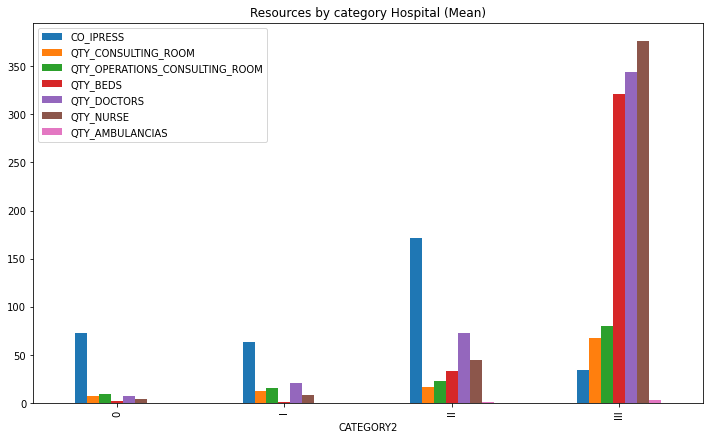

In [133]:
abc = data_temp.plot(kind="bar", stacked=False,figsize=(12,7))
#abc.yaxis.set_major_formatter(millions)
abc.set_title('Resources by category Hospital (Mean)')